# 1. Install dependencies before reproducing results

In [2]:
# !pip install -r requirements.txt

# 2. Exploratory Data Analysis

## 2.1 Import and Clean Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [279]:
ori_df = pd.read_csv("6M-0K-99K.users.dataset.public.csv")
ori_df.shape

(98913, 24)

In [5]:
ori_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

In [6]:
# No missing data found
ori_df.isnull().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64

In [7]:
# Make a copy from original dataset
df = ori_df.copy()

# Removing duplicated covariates from imported data
varToDrop = ['identifierHash','type','country','civilityGenderId','seniority','seniorityAsMonths']
df.drop(varToDrop, axis=1, inplace=True)

# Reordering columns
df = df[['countryCode','language','gender','civilityTitle','socialNbFollowers','socialNbFollows','socialProductsLiked','productsListed','productsWished','productsSold', 
         'productsPassRate','productsBought','hasAnyApp','hasAndroidApp','hasIosApp','hasProfilePicture','daysSinceLastLogin','seniorityAsYears']]
df.describe(include='all')

,countryCode,language,gender,civilityTitle,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsWished,productsSold,productsPassRate,productsBought,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniorityAsYears
count,98913,98913,98913,98913,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913,98913,98913,98913,98913.000000,98913.000000
unique,199,5,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,NaN
top,fr,en,F,mrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,True,NaN,NaN
freq,25135,51564,76121,75684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72739,94094,77386,97018,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.432269,8.425677,4.420743,0.093304,1.562595,0.121592,0.812303,0.171929,NaN,NaN,NaN,NaN,655.732310,8.510424
std,NaN,NaN,NaN,NaN,3.882383,52.839572,181.030569,2.050144,25.192793,2.126895,8.500205,2.332266,NaN,NaN,NaN,NaN,7407.430369,0.467863
min,NaN,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,11.000000,7.920000
25%,NaN,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,572.000000,7.940000
50%,NaN,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,694.000000,8.880000
75%,NaN,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,702.000000,8.890000


In [8]:
df.describe()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsWished,productsSold,productsPassRate,productsBought,daysSinceLastLogin,seniorityAsYears
count,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,3.432269,8.425677,4.420743,0.093304,1.562595,0.121592,0.812303,0.171929,655.732310,8.510424
std,3.882383,52.839572,181.030569,2.050144,25.192793,2.126895,8.500205,2.332266,7407.430369,0.467863
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,7.920000
25%,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,572.000000,7.940000
50%,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,694.000000,8.880000
75%,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,702.000000,8.890000
max,744.000000,13764.000000,51671.000000,244.000000,2635.000000,174.000000,100.000000,405.000000,737028.000000,8.900000


## 2.2 Identifying and Removing Outliers

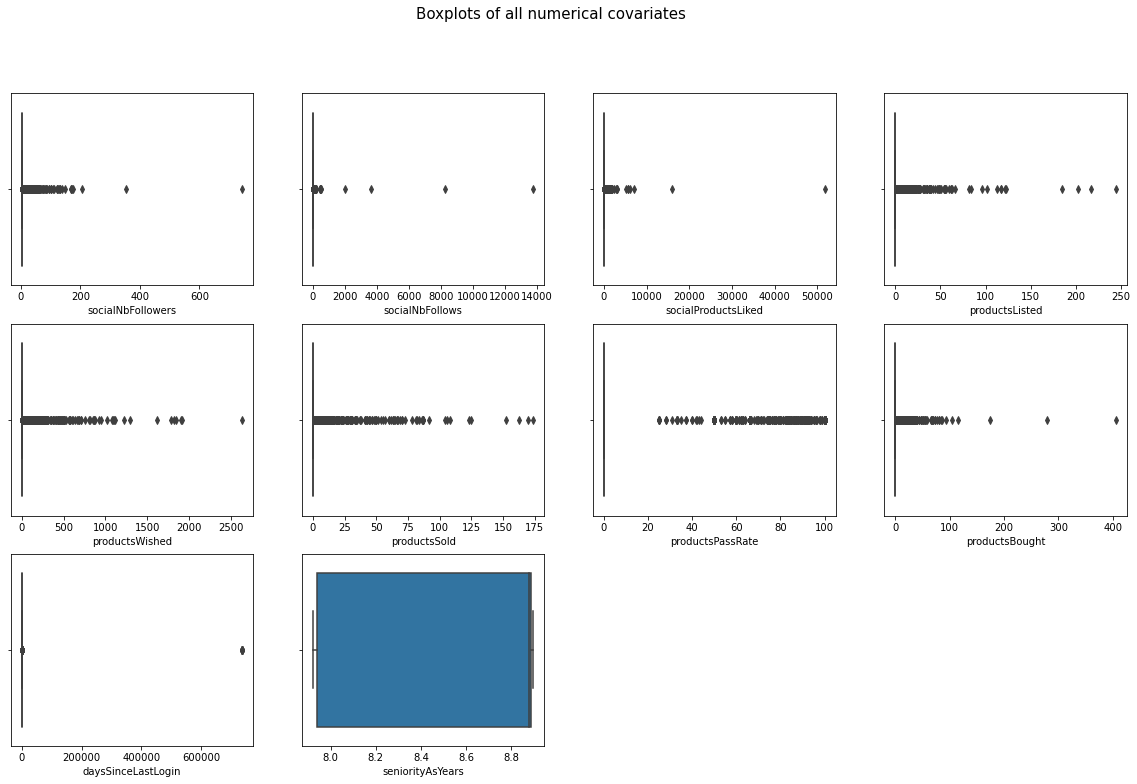

In [9]:
FIG = plt.figure(figsize=(20, 12))
plt.suptitle('Boxplots of all numerical covariates', fontsize=15)
FIG.add_subplot(341)
sns.boxplot(x='socialNbFollowers', data=df)
FIG.add_subplot(342)
sns.boxplot(x='socialNbFollows', data=df)
FIG.add_subplot(343)
sns.boxplot(x='socialProductsLiked', data=df)
FIG.add_subplot(344)
sns.boxplot(x='productsListed', data=df)
FIG.add_subplot(345)
sns.boxplot(x='productsWished', data=df)
FIG.add_subplot(346)
sns.boxplot(x='productsSold', data=df)
FIG.add_subplot(347)
sns.boxplot(x='productsPassRate', data=df)
FIG.add_subplot(348)
sns.boxplot(x='productsBought', data=df)
FIG.add_subplot(349)
sns.boxplot(x='daysSinceLastLogin', data=df)
FIG.add_subplot(3,4,10)
sns.boxplot(x='seniorityAsYears', data=df)
plt.show()

In [10]:
df.sort_values(by='daysSinceLastLogin',ascending=False).head(15)

,countryCode,language,gender,civilityTitle,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsWished,productsSold,productsPassRate,productsBought,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniorityAsYears
89086,au,en,M,mr,3,8,0,0,0,0,0.0,0,True,False,True,True,737028,7.92
89093,gb,en,F,mrs,3,8,0,0,0,0,0.0,0,False,False,False,True,737028,7.92
89084,us,en,M,mr,3,8,0,0,0,0,0.0,0,True,False,True,True,737028,7.92
89089,us,en,F,mrs,3,8,0,0,0,0,0.0,0,True,False,True,True,737028,7.92
89083,au,en,M,mr,3,8,0,0,0,0,0.0,0,True,False,True,True,737028,7.92
89088,es,es,F,mrs,3,8,0,0,0,0,0.0,0,True,True,False,True,737028,7.92
87544,se,en,F,mrs,3,8,0,0,0,0,0.0,0,True,False,True,True,737028,7.92
89090,us,en,M,mr,3,8,0,0,0,0,0.0,0,False,False,False,True,737028,7.92
89091,gb,en,F,mrs,3,8,0,0,0,0,0.0,0,False,False,False,True,737028,7.92
89087,it,it,F,mrs,3,8,0,0,0,0,0.0,0,False,False,False,True,737028,7.92


In [11]:
# Remove outlier data found from 'daysSinceLastLogin' covariate
df_clean = df[df['daysSinceLastLogin'] != 737028]

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98903 entries, 0 to 98912
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   countryCode          98903 non-null  object 
 1   language             98903 non-null  object 
 2   gender               98903 non-null  object 
 3   civilityTitle        98903 non-null  object 
 4   socialNbFollowers    98903 non-null  int64  
 5   socialNbFollows      98903 non-null  int64  
 6   socialProductsLiked  98903 non-null  int64  
 7   productsListed       98903 non-null  int64  
 8   productsWished       98903 non-null  int64  
 9   productsSold         98903 non-null  int64  
 10  productsPassRate     98903 non-null  float64
 11  productsBought       98903 non-null  int64  
 12  hasAnyApp            98903 non-null  bool   
 13  hasAndroidApp        98903 non-null  bool   
 14  hasIosApp            98903 non-null  bool   
 15  hasProfilePicture    98903 non-null 

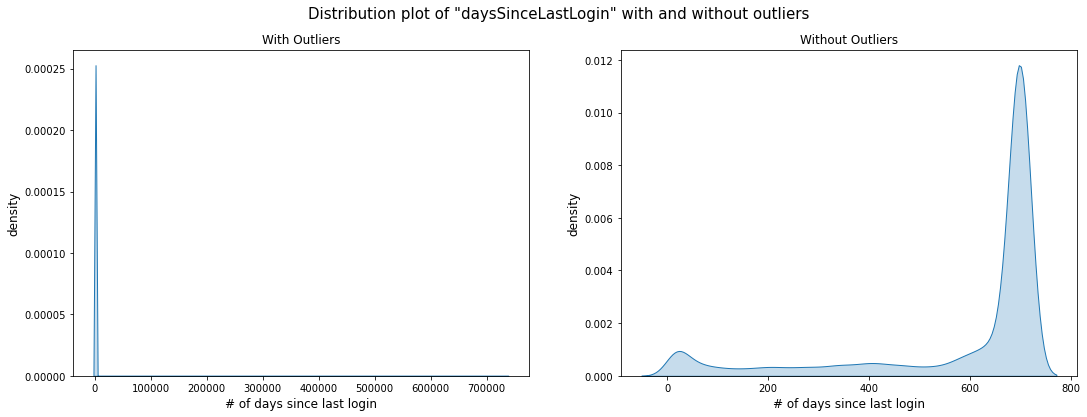

In [277]:
FIG = plt.figure(figsize=(18, 6))
plt.suptitle('Distribution plot of "daysSinceLastLogin" with and without outliers', fontsize=15)

FIG.add_subplot(121)
# sns.boxplot(x='daysSinceLastLogin', data=df)
plt.xlabel("# of days since last login", fontsize=12)
plt.ylabel("density", fontsize=12)
plt.title("With Outliers")
sns.kdeplot(np.array(df['daysSinceLastLogin']), shade=True)

FIG.add_subplot(122)
# sns.boxplot(x='daysSinceLastLogin', data=df_clean)
plt.xlabel("# of days since last login", fontsize=12)
plt.ylabel("density", fontsize=12)
plt.title("Without Outliers")
sns.kdeplot(np.array(df_clean['daysSinceLastLogin']), shade=True)
plt.show()

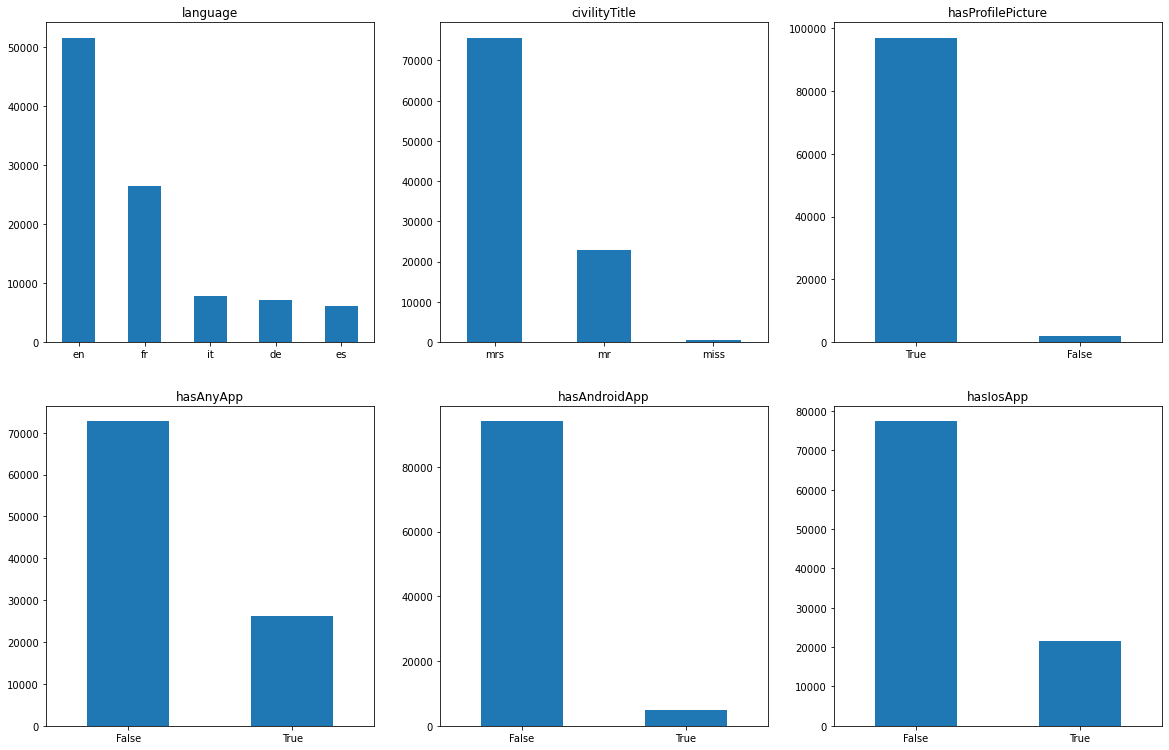

In [283]:
FIG = plt.figure(figsize=(20, 20))

FIG.add_subplot(331)
df_clean['language'].value_counts().plot(kind='bar', title='language')
plt.xticks(rotation=0)
FIG.add_subplot(332)
df_clean['civilityTitle'].value_counts().plot(kind='bar', title='civilityTitle')
plt.xticks(rotation=0)
FIG.add_subplot(333)
df_clean['hasProfilePicture'].value_counts().plot(kind='bar', title='hasProfilePicture')
plt.xticks(rotation=0)
FIG.add_subplot(334)
df_clean['hasAnyApp'].value_counts().plot(kind='bar', title='hasAnyApp')
plt.xticks(rotation=0)
FIG.add_subplot(335)
df_clean['hasAndroidApp'].value_counts().plot(kind='bar', title='hasAndroidApp')
plt.xticks(rotation=0)
FIG.add_subplot(336)
df_clean['hasIosApp'].value_counts().plot(kind='bar', title='hasIosApp')
plt.xticks(rotation=0)
plt.show()

Overview characteristics of all users:
1. Prefer english language
2. Married females
3. Engages with social network feature
4. Never used company's official application - access via website

## 2.3 Segmentation of Users

Users are considered active if the # of days since their last login is less than 6 months (~180 days)

Segmentation of Active and Inactive Users:
1. Buyers
2. Seller
3. Buyers and Sellers
4. Non-Buyers and Non-Sellers

Note: Buyers and Sellers groups are not mutually exclusive, there will be users that are both buyers and sellers, or neither

In [88]:
# segment users by adding buyer, seller, buyerAndSeller columns
# create df of each segment to explore relationships and identify patterns
df_final = df_clean.copy()
df_final.loc[df_final['productsBought'] > 0 , 'buyer'] = 1
df_final.loc[df_final['productsSold'] > 0 , 'seller'] = 1
df_final['buyer'] = df_final['buyer'].replace(np.nan,0).apply(int)
df_final['seller'] = df_final['seller'].replace(np.nan,0).apply(int)

def cond_neither(df):
    if (df['buyer'] == 0) and (df['seller'] == 0):
        return 1
    else:
        return 0
        
def cond_both(df):
    if (df['buyer'] == 1) and (df['seller'] == 1):
        return 1
    else:
        return 0

df_final['buyerAndSeller'] = df_final.apply(cond_both, axis=1)
df_final['notBuyerAndSeller'] = df_final.apply(cond_neither, axis=1)
df_final.loc[df_final['daysSinceLastLogin'] < 180 , 'activeStatus'] = 'active'
df_final['activeStatus'] = df_final['activeStatus'].replace(np.nan,'inactive')
                                                                                                   
df_final.head()

,countryCode,language,gender,civilityTitle,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsWished,productsSold,productsPassRate,productsBought,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniorityAsYears,buyer,seller,buyerAndSeller,notBuyerAndSeller,activeStatus
0,us,en,F,mrs,3,8,0,0,0,0,0.0,0,False,False,False,True,709,8.9,0,0,0,1,inactive
1,de,de,F,mrs,3,8,0,0,0,0,0.0,0,False,False,False,True,709,8.9,0,0,0,1,inactive
2,se,en,M,mr,3,8,0,0,0,0,0.0,0,True,False,True,True,689,8.9,0,0,0,1,inactive
3,tr,en,F,mrs,3,8,0,0,0,0,0.0,0,False,False,False,True,709,8.9,0,0,0,1,inactive
4,fr,en,M,mr,3,8,0,0,0,0,0.0,0,True,False,True,True,709,8.9,0,0,0,1,inactive


In [281]:
userSegPivot = df_final[['activeStatus','buyer','seller','buyerAndSeller','notBuyerAndSeller']]
userSegPivot = userSegPivot.groupby(['activeStatus','buyer','seller','buyerAndSeller','notBuyerAndSeller'],as_index=False).size().rename(columns={"size": "# of users"})
userSegPivot['% of users'] = round(userSegPivot['# of users'] / userSegPivot['# of users'].sum() * 100,2)
userSegPivot

,activeStatus,buyer,seller,buyerAndSeller,notBuyerAndSeller,# of users,% of users
0,active,0,0,0,1,6103,6.17
1,active,0,1,0,0,811,0.82
2,active,1,0,0,0,2160,2.18
3,active,1,1,1,0,478,0.48
4,inactive,0,0,0,1,85907,86.86
5,inactive,0,1,0,0,663,0.67
6,inactive,1,0,0,0,2697,2.73
7,inactive,1,1,1,0,84,0.08


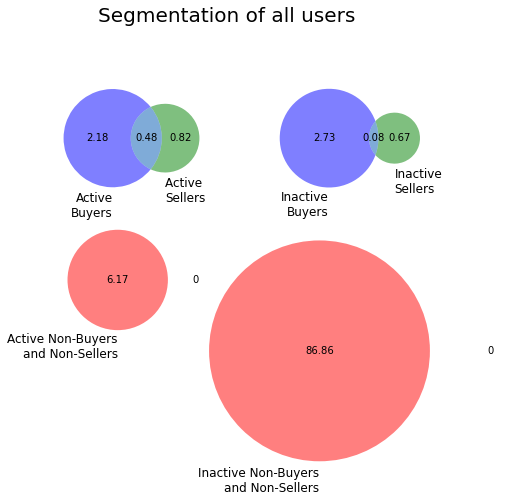

In [288]:
fig = plt.figure(figsize=(15,10))
plt.suptitle('Segmentation of all users', fontsize=20)
ax = fig.add_gridspec(4, 4)
ax1 = fig.add_subplot(ax[0,1])
venn2(subsets = (2.18,0.82,0.48), set_labels = ('Active\nBuyers', 'Active \nSellers'), set_colors=('b', 'g'), alpha = 0.5);
ax1 = fig.add_subplot(ax[0,2])
venn2(subsets = (2.73,0.67,0.08), set_labels = ('Inactive\nBuyers', 'Inactive\nSellers'), set_colors=('b', 'g'), alpha = 0.5);
ax1 = fig.add_subplot(ax[1,1])
venn2(subsets = (6.17,0,0), set_labels = ('Active Non-Buyers\nand Non-Sellers',''), alpha = 0.5);
ax1 = fig.add_subplot(ax[1:3,1:4])
venn2(subsets = (86.86,0,0), set_labels = ('Inactive Non-Buyers\nand Non-Sellers',''), alpha = 0.5);
plt.show()

In [360]:
buyerPivot = df_final[['activeStatus','buyer']]
buyerPivot = buyerPivot.groupby(['buyer','activeStatus'],as_index=False).size().rename(columns={"size": "# of users"})
buyerPivot['% of users'] = round(buyerPivot['# of users'] / buyerPivot['# of users'].sum() * 100,2)
buyerPivot = buyerPivot[buyerPivot['buyer'] == 1].reset_index().drop(columns=['index'])

boughtPivot = df_final[['activeStatus','buyer','productsBought']]
boughtPivot = boughtPivot.groupby(['buyer','activeStatus'],as_index=False).agg([np.sum,np.mean])

buyerPivot['productsBought_sum'] = boughtPivot.reset_index().drop([0,1]).reset_index()['productsBought'][['sum']]
buyerPivot['productsBought_mean'] = boughtPivot.reset_index().drop([0,1]).reset_index()['productsBought'][['mean']]
buyerPivot

,buyer,activeStatus,# of users,% of users,productsBought_sum,productsBought_mean
0,1,active,2638,2.67,12602,4.777104
1,1,inactive,2781,2.81,4404,1.583603


A lot of potential

In [369]:
sellerPivot = df_final[['activeStatus','seller']]
sellerPivot = sellerPivot.groupby(['seller','activeStatus'],as_index=False).size().rename(columns={"size": "# of users"})
sellerPivot['% of users'] = round(sellerPivot['# of users'] / sellerPivot['# of users'].sum() * 100,2)
sellerPivot = sellerPivot[sellerPivot['seller'] == 1].reset_index().drop(columns=['index'])

soldPivot = df_final[['activeStatus','seller','productsSold']]
soldPivot = soldPivot.groupby(['seller','activeStatus'],as_index=False).agg([np.sum,np.mean])

sellerPivot['productsSold_sum'] = soldPivot.reset_index().drop([0,1]).reset_index()['productsSold'][['sum']]
sellerPivot['productsSold_mean'] = soldPivot.reset_index().drop([0,1]).reset_index()['productsSold'][['mean']]
sellerPivot

,seller,activeStatus,# of users,% of users,productsSold_sum,productsSold_mean
0,1,active,1289,1.30,10398,8.066718
1,1,inactive,747,0.76,1629,2.180723


## 2.4 Identifying Relationship between Covariates

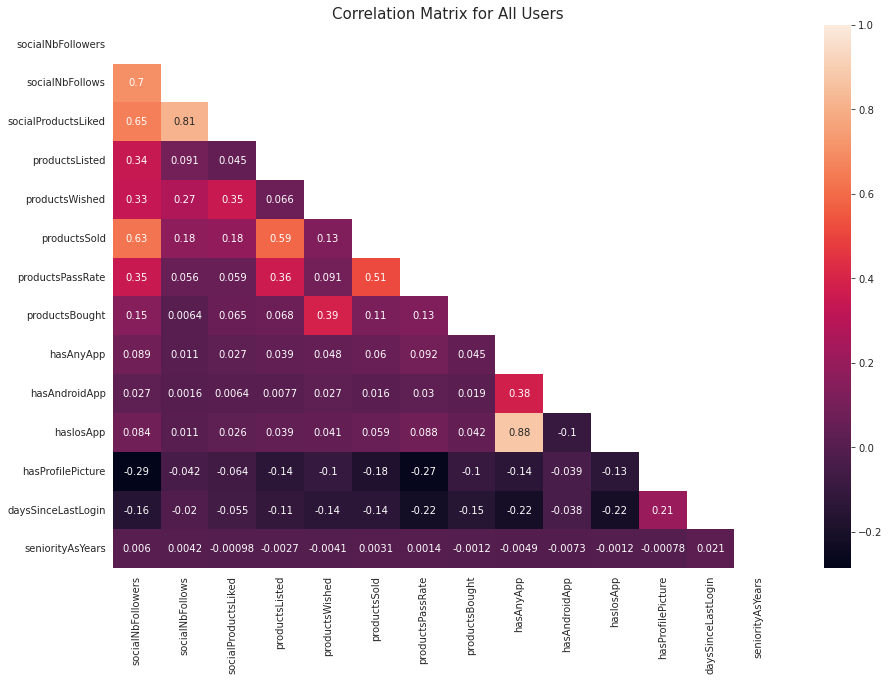

In [374]:
# corr = df.corr()
# sns.heatmap(corr, annot=True, square=True)
# plt.yticks(rotation=0)
# plt.show()

mask = np.zeros_like(df_clean.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(df_clean.corr(), annot=True, mask=mask, vmax=1, square=False)
plt.title(f'Correlation Matrix for All Users', fontsize=15)
plt.show()

In [382]:
activeBuyersDf = df_final[(df_final['buyer'] == 1) & (df_final['activeStatus'] == 'active')]
inactiveBuyersDf = df_final[(df_final['buyer'] == 1) & (df_final['activeStatus'] == 'inactive')]
activeSellersDf = df_final[(df_final['seller'] == 1) & (df_final['activeStatus'] == 'active')]
inactiveSellersDf = df_final[(df_final['seller'] == 1) & (df_final['activeStatus'] == 'inactive')]

747

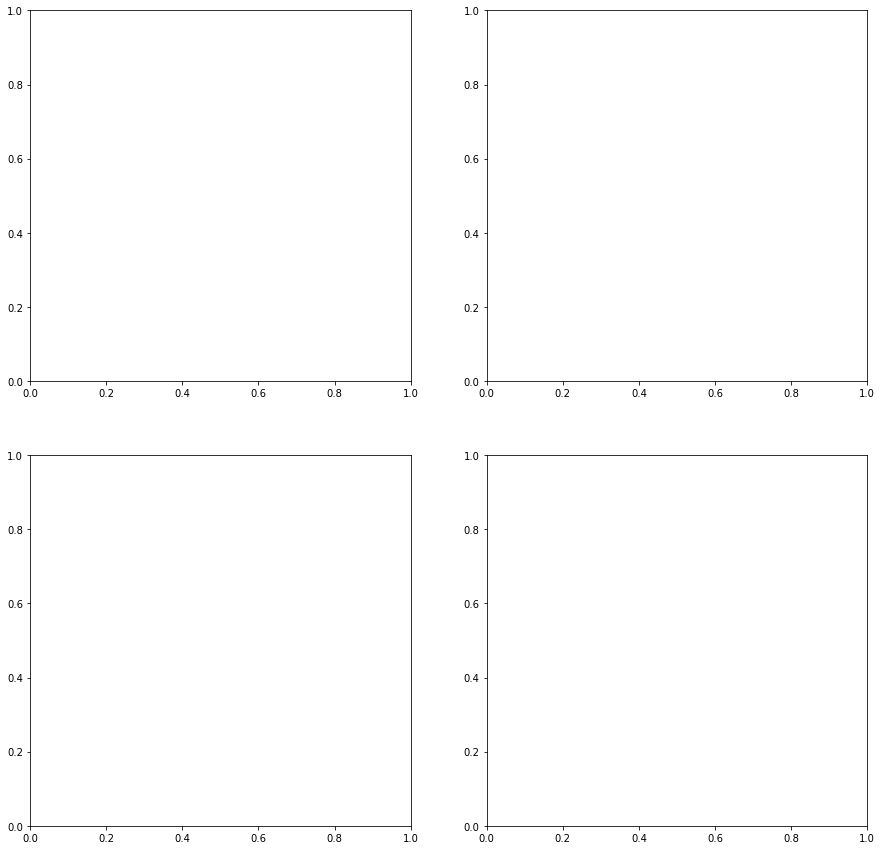

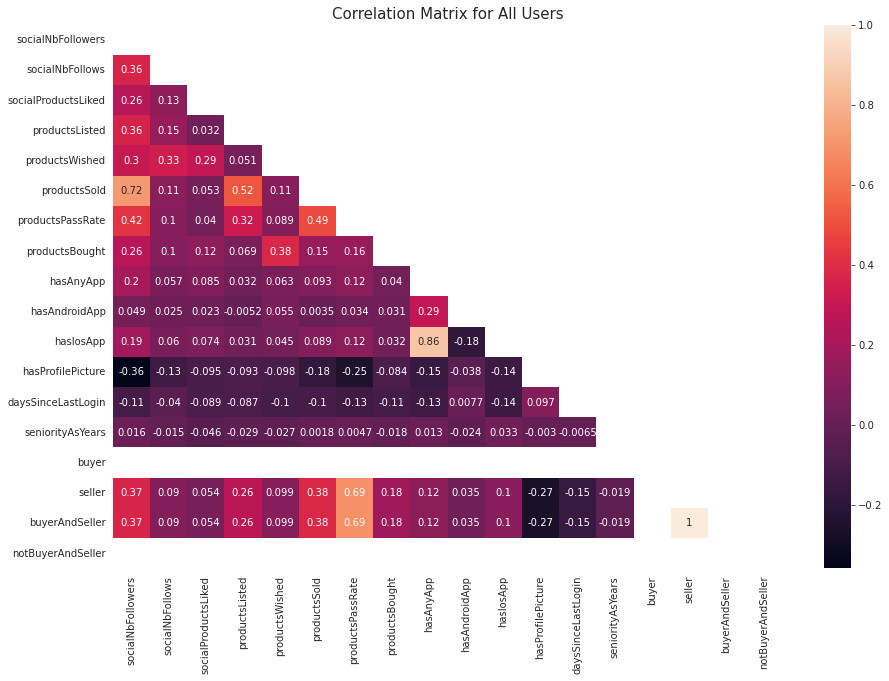

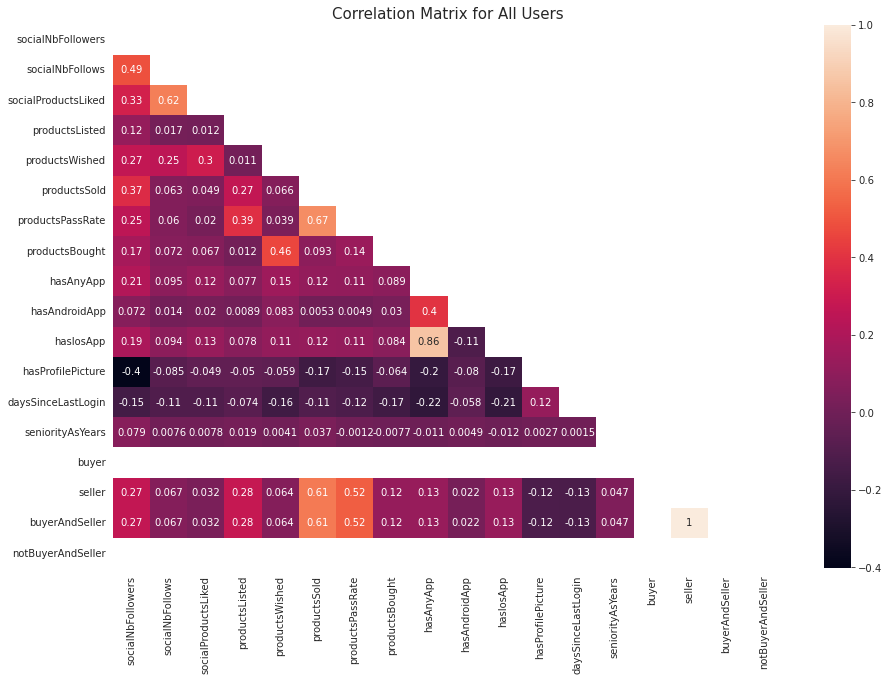

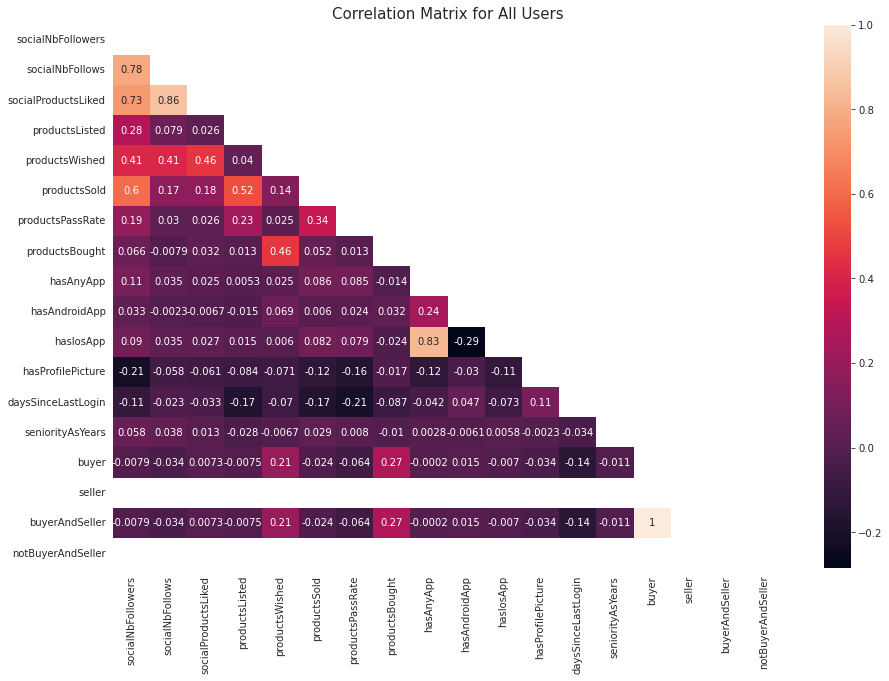

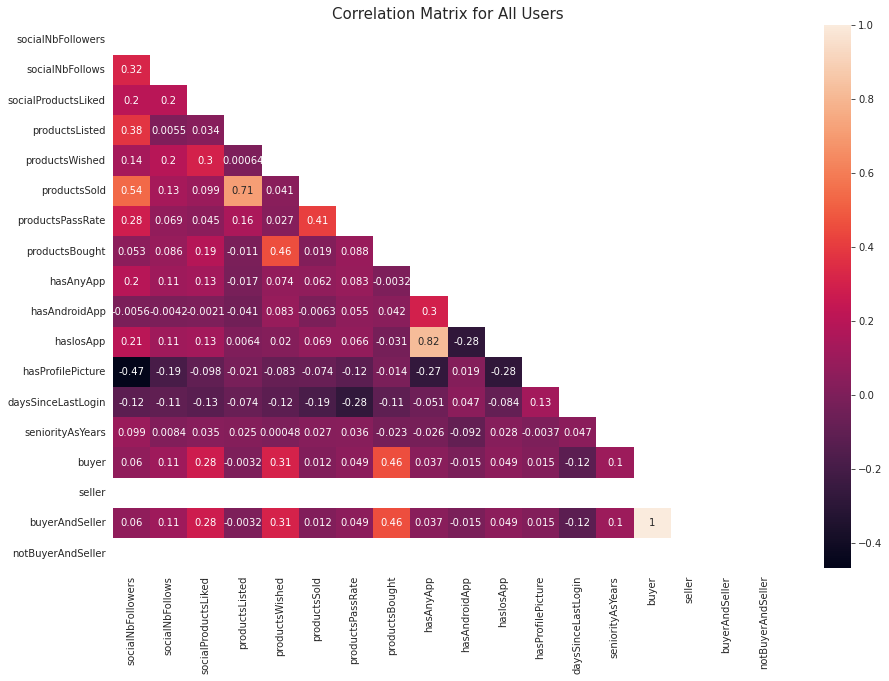

In [384]:
FIG = plt.figure(figsize=(15,15))
FIG.add_subplot(221)
mask = np.zeros_like(activeBuyersDf.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(activeBuyersDf.corr(), annot=True, mask=mask, vmax=1, square=False)

FIG.add_subplot(222)
mask = np.zeros_like(inactiveBuyersDf.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(inactiveBuyersDf.corr(), annot=True, mask=mask, vmax=1, square=False)

FIG.add_subplot(223)
mask = np.zeros_like(activeSellersDf.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(activeSellersDf.corr(), annot=True, mask=mask, vmax=1, square=False)

FIG.add_subplot(224)
mask = np.zeros_like(inactiveSellersDf.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(inactiveSellersDf.corr(), annot=True, mask=mask, vmax=1, square=False)
    
plt.show()

# DRAFT CODE

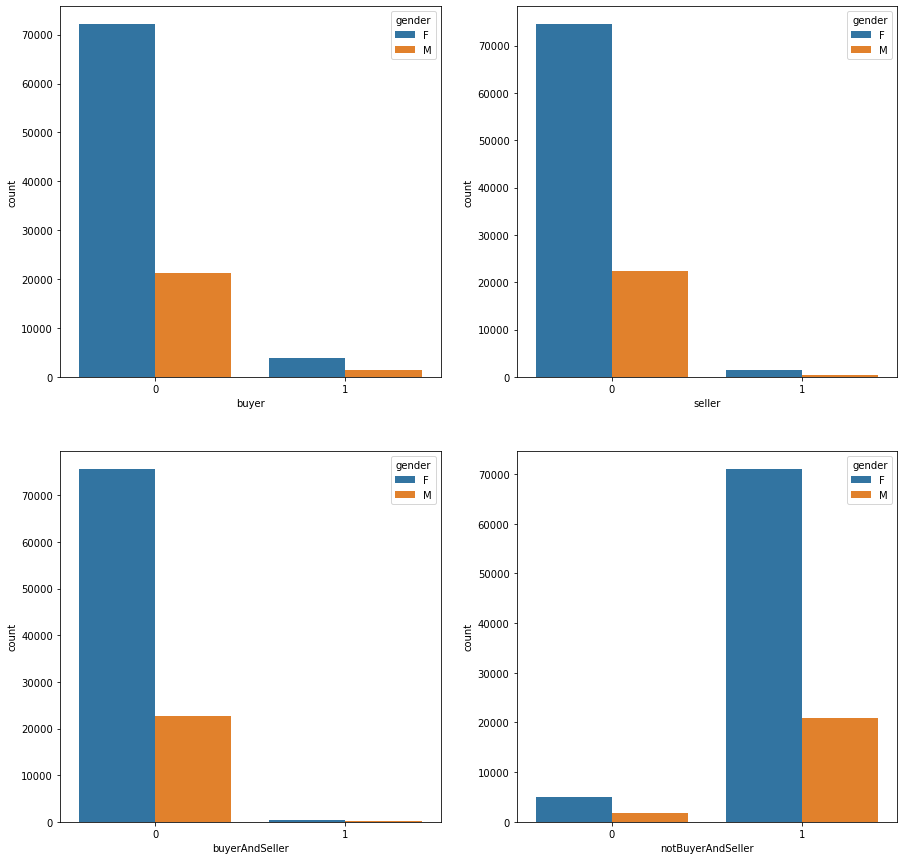

In [29]:
FIG = plt.figure(figsize=(15,15))
FIG.add_subplot(221)
sns.countplot(x='buyer',data=df_final,hue='gender')
FIG.add_subplot(222)
sns.countplot(x='seller',data=df_final,hue='gender')
FIG.add_subplot(223)
sns.countplot(x='buyerAndSeller',data=df_final,hue='gender')
FIG.add_subplot(224)
sns.countplot(x='notBuyerAndSeller',data=df_final,hue='gender')
plt.show()

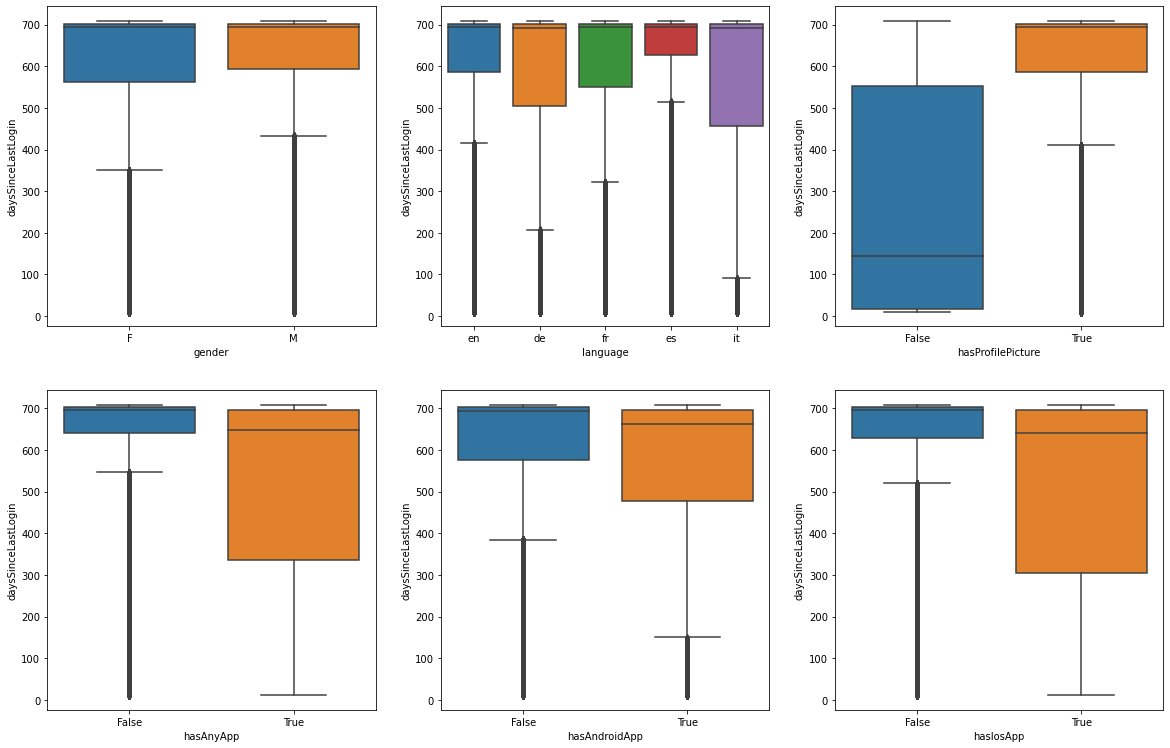

In [96]:
FIG = plt.figure(figsize=(20, 20))

FIG.add_subplot(331)
sns.boxplot(x='gender', y='daysSinceLastLogin', data=test)

FIG.add_subplot(332)
sns.boxplot(x='language', y='daysSinceLastLogin', data=test)

FIG.add_subplot(333)
sns.boxplot(x='hasProfilePicture', y='daysSinceLastLogin', data=test)

FIG.add_subplot(334)
sns.boxplot(x='hasAnyApp', y='daysSinceLastLogin', data=test)

FIG.add_subplot(335)
sns.boxplot(x='hasAndroidApp', y='daysSinceLastLogin', data=test)

FIG.add_subplot(336)
sns.boxplot(x='hasIosApp', y='daysSinceLastLogin', data=test)

plt.show()

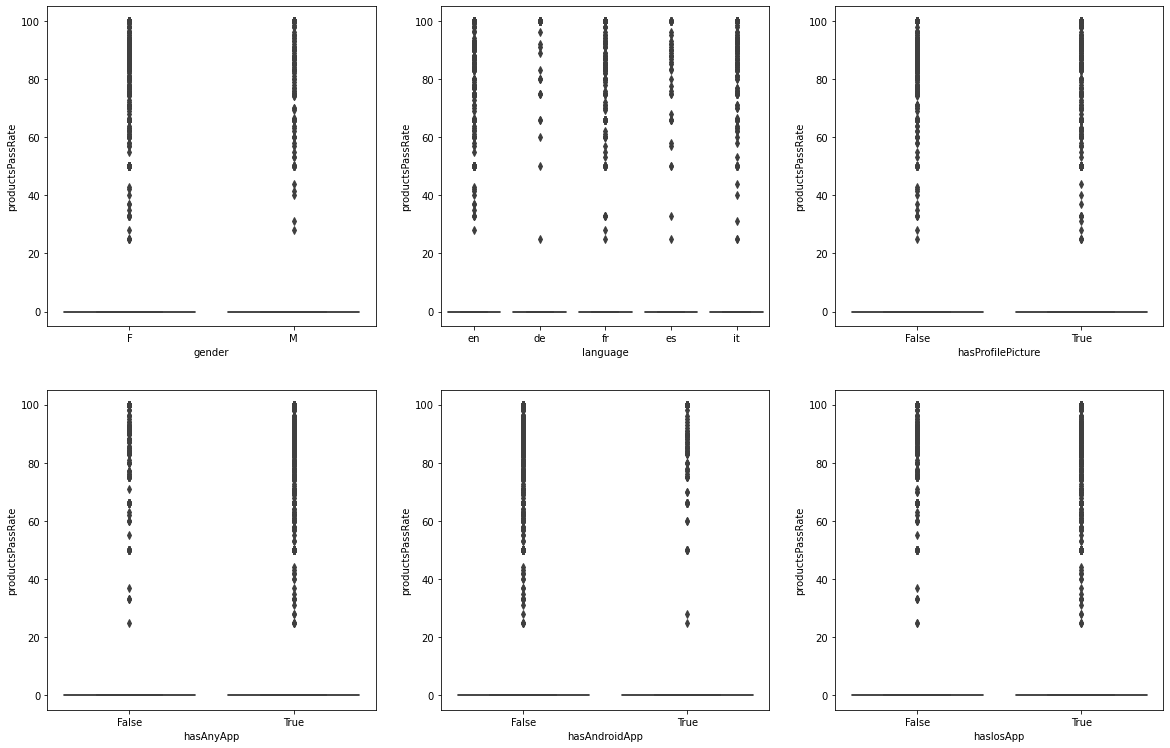

In [106]:
FIG = plt.figure(figsize=(20, 20))

FIG.add_subplot(331)
sns.boxplot(x='gender', y='productsPassRate', data=test)

FIG.add_subplot(332)
sns.boxplot(x='language', y='productsPassRate', data=test)

FIG.add_subplot(333)
sns.boxplot(x='hasProfilePicture', y='productsPassRate', data=test)

FIG.add_subplot(334)
sns.boxplot(x='hasAnyApp', y='productsPassRate', data=test)

FIG.add_subplot(335)
sns.boxplot(x='hasAndroidApp', y='productsPassRate', data=test)

FIG.add_subplot(336)
sns.boxplot(x='hasIosApp', y='productsPassRate', data=test)

plt.show()

In [30]:
# 'socialNbFollowers','socialNbFollows','socialProductsLiked','productsListed','productsSold','productsPassRate','productsWished','productsBought'
# 'daysSinceLastLogin','seniority','seniorityAsMonths','seniorityAsYears'

# country
# language
# gender
# hasAnyApp
# hasAndroidApp
# hasIosApp
# hasProfilePicture

In [103]:
df_clean = test.copy()
df_clean.loc[df_clean['productsBought'] > 0 , 'buyer'] = 1
df_clean.loc[df_clean['productsSold'] > 0 , 'seller'] = 1
df_clean['buyer'] = df_clean['buyer'].replace(np.nan,0).apply(int)
df_clean['seller'] = df_clean['seller'].replace(np.nan,0).apply(int)

def cond_neither(df):
    if (df['buyer'] == 0) and (df['seller'] == 0):
        return 1
    else:
        return 0

def cond_both(df):
    if (df['buyer'] == 1) and (df['seller'] == 1):
        return 1
    else:
        return 0

df_clean['neither'] = df_clean.apply(cond_neither, axis=1)
df_clean['both'] = df_clean.apply(cond_both, axis=1)

df_clean = df_clean[df_clean['neither'] == 0]
df_clean = df_clean.drop(columns=['neither'])                                                                                                               
df_clean.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,buyer,seller,both
46,-1369438276320193587,user,France,fr,31,8,0,1,1,0.0,0,1,F,2,mrs,True,False,True,False,127,3205,106.83,8.9,fr,1,1,1
51,-6589093921826008799,user,Etats-Unis,en,3,9,1,0,0,0.0,14,1,M,1,mr,False,False,False,True,26,3205,106.83,8.9,us,1,0,0
85,-937288556484695351,user,Suède,en,5,8,0,0,0,0.0,107,1,M,1,mr,False,False,False,True,543,3205,106.83,8.9,se,1,0,0
95,7144186809315241123,user,Canada,en,4,10,1,0,0,0.0,7,1,F,2,mrs,True,True,False,True,208,3205,106.83,8.9,ca,1,0,0
102,4994268169579335625,user,Royaume-Uni,en,3,8,0,0,0,0.0,0,2,F,2,mrs,False,False,False,True,27,3205,106.83,8.9,gb,1,0,0


In [105]:
df_clean.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,buyer,seller,both
count,6.893000e+03,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000
mean,-1.191618e+16,6.777455,13.540984,44.318004,1.210213,1.744814,11.656362,16.170318,2.467141,1.758451,277.020310,3067.008704,102.233501,8.519418,0.786160,0.295372,0.081532
std,5.307866e+18,13.910473,200.094334,681.880940,7.646123,7.879719,30.175166,90.304701,8.508947,0.481645,266.095413,167.619338,5.587133,0.465919,0.410045,0.456243,0.273670
min,-9.221801e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000,0.000000,0.000000,0.000000
25%,-4.562964e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,22.000000,2857.000000,95.230000,7.940000,1.000000,0.000000,0.000000
50%,5.480978e+15,4.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,179.000000,3197.000000,106.570000,8.880000,1.000000,0.000000,0.000000
75%,4.488304e+18,6.000000,8.000000,12.000000,0.000000,1.000000,0.000000,4.000000,2.000000,2.000000,566.000000,3201.000000,106.700000,8.890000,1.000000,1.000000,0.000000
max,9.221188e+18,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,709.000000,3205.000000,106.830000,8.900000,1.000000,1.000000,1.000000


C:\Users\Mattheus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mattheus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mattheus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

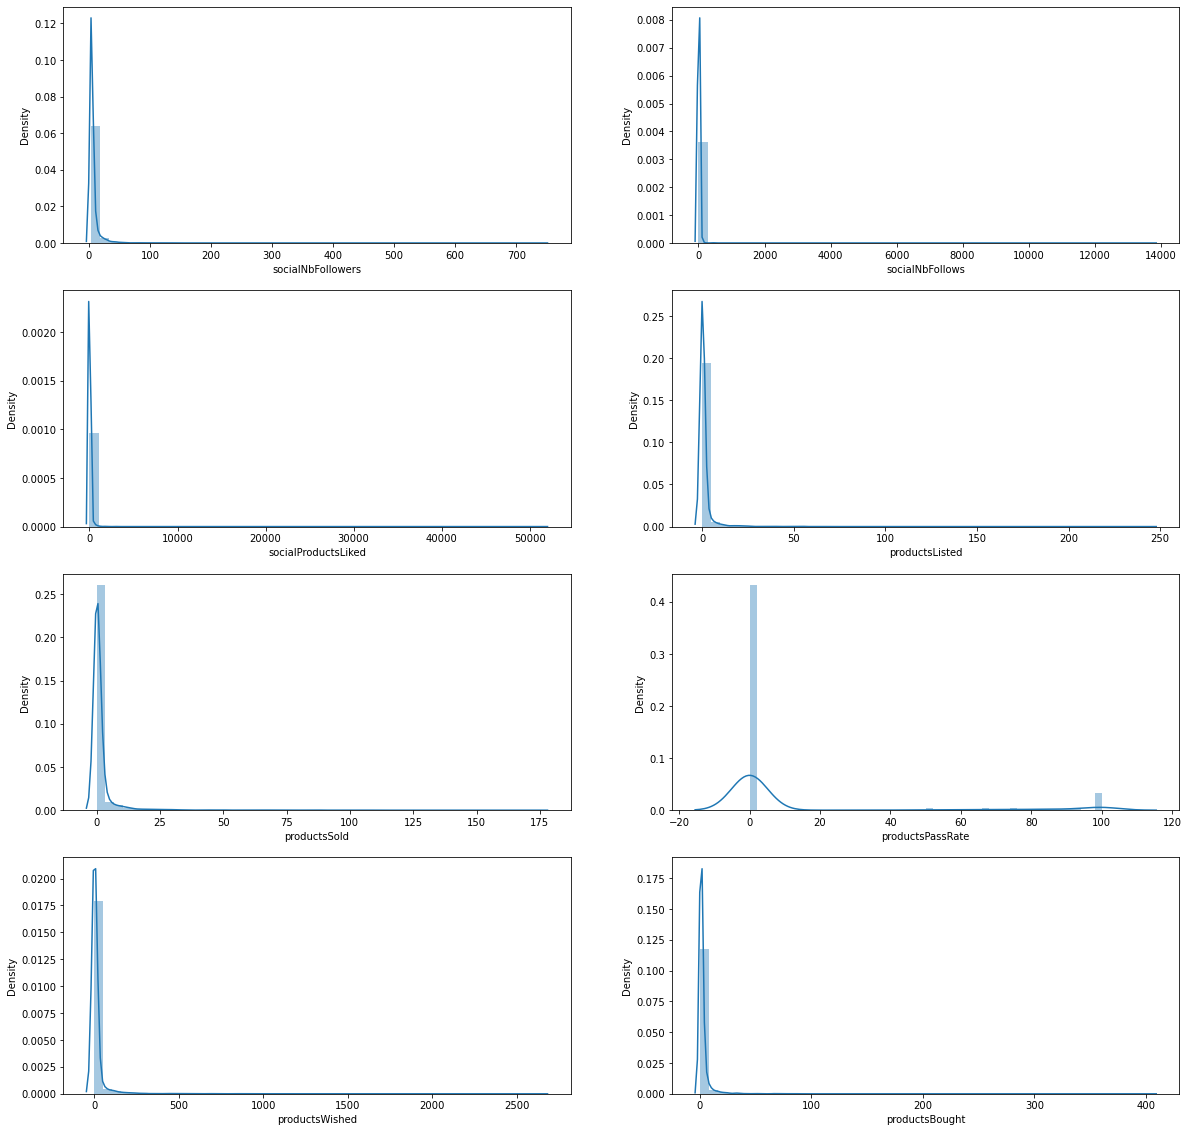

In [104]:
FIG = plt.figure(figsize=(20, 20))

FIG.add_subplot(421)
sns.distplot(df_clean['socialNbFollowers'])

FIG.add_subplot(422)
sns.distplot(df_clean['socialNbFollows'])

FIG.add_subplot(423)
sns.distplot(df_clean['socialProductsLiked'])

FIG.add_subplot(424)
sns.distplot(df_clean['productsListed'])

FIG.add_subplot(425)
sns.distplot(df_clean['productsSold'])

FIG.add_subplot(426)
sns.distplot(df_clean['productsPassRate'])

FIG.add_subplot(427)
sns.distplot(df_clean['productsWished'])

FIG.add_subplot(428)
sns.distplot(df_clean['productsBought'])

plt.show()

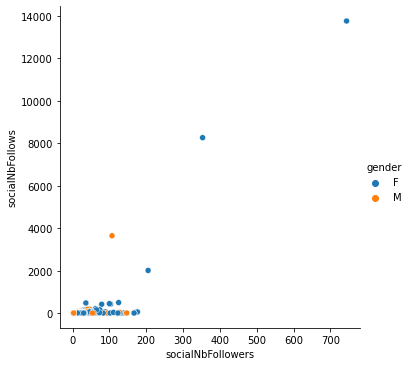

In [32]:
sns.relplot(x='socialNbFollowers', y='socialNbFollows', hue='gender', data=df)

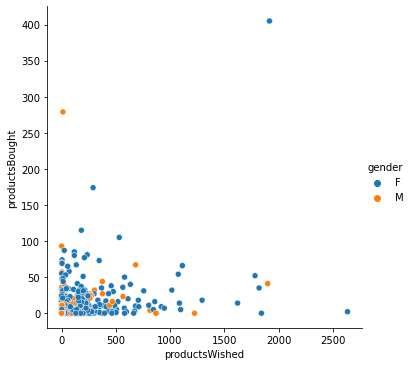

In [33]:
sns.relplot(x='productsWished', y='productsBought', hue='gender', data=df)